# Introduction to using matplotlib for line and bar charts

This activity provides both an introduction to matplotlib and to line and bar charts. Over the next few weeks we will look at different tools and introduce further chart types.

This notebook allows you to show matplotlib figures directly in the notebook using inline magic commands ```%matplotlib notebook``` and ```%matplotlib```.

You won't be able to use these later in your Flask app, however they provide a convenient method for learning. You can also use a Jupyter notebook for your first group coursework.

Let's get the environment set up and ready to use. You will need to 'run' the following cell (e.g. click inside the cell and press Ctrl and Enter together).

In [ ]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.get_backend()
import matplotlib.pyplot as plt
import xlrd

## Understanding the Matplotlib architecture
To use matplotlib effectively you should take a few minutes to understand the architecture and terminology. There is a good explanation in [this repository](https://nbviewer.jupyter.org/github/matplotlib/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part1-Figures_Subplots_and_layouts.ipynb) and by [Jun Ye](https://junye0798.com/post/plt-xxx-or-ax-xxx-that-is-the-question-in-matplotlib/).

Make sure that you understand:
1. The three layers (backend layer, artist layer and scripting layer)
2. The difference between figure, axes and plot

Two examples of basic line graphs using the scripting layer and artist layer are shown below. We will focus on using the artist layer as this provides the most options for customisation. However, you will find many examples of both in online tutorials and you may use either for the coursework, depending on your needs.

In [4]:
# Basic line graph using the scripting layer
plt.figure()
data = [1, 2, 3, 4]
plt.plot(data)
plt.ylabel('y-axis label')
plt.xlabel('x-axis label')
plt.title('Title goes here')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


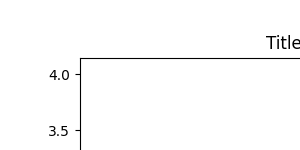

In [12]:
# Basic line graph using the artist layer

data = [1, 2, 3, 4]
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(data)
ax1.set_xlabel('x-axis label')
ax1.set_ylabel('y-axis label')
ax1.set_title('Title goes here')
fig.canvas.draw()

## Line graphs
The above examples while simplistic introduced you to the line graph. 

Read the [line graph](https://datavizcatalogue.com/methods/line_graph.html) entry in the data visualisation catalogue and the [interactive chart chooser](https://depictdatastudio.com/charts/line/) to understand more about the anatomy and use of line graphs. In short these are typically used to show patterns or trends over time.

### Create a line graph
Let's return to the COVID school closures data set that you saw in the COMP0035 data cleansing activity. This is saved in the file `CGD_COVID.xlsx` which was downloaded from: https://docs.google.com/spreadsheets/d/1ndHgP53atJ5J-EtxgWcpSfYG8LdzHpUsnb6mWybErYg/edit?ts=5e6f893e#gid=0

Let's import and explore this data:

In [ ]:
# Load the xlsx file into a pandas DataFrame and skip the first line which contains the logo
df = pd.read_excel('CGD_COVID.xlsx', sheet_name='School closure tracker- Global', skiprows = 1)

# Show the first few rows of data
df.head(5)

,Country,Code,Region,Income Group,School Closures,As of,Date,Number of confirmed cases at time of closure,Planned Reopening,Planned Length of Closure (Weeks),...,Other supports - Childcare,Other supports - Childcare (Detail),Other supports - Meals,Other supports - Meals (Details),Other supports - Other,Source,Source.1,Facebook Page,Official COVID Education Policy Document,Source for Re-opening
0,Afghanistan,AFG,South Asia,Low income,Yes,NaN,2020-03-17,22,1 month,4,...,NaN,NaN,NaN,NaN,NaN,https://www-washingtonpost-com.ezp-prod1.hul.h...,https://moe.gov.af/index.php/en/all-news\n\nht...,https://www.facebook.com/MoEAfghanistan/?hc_re...,https://planipolis.iiep.unesco.org/sites/plani...,NaN
1,Albania,ALB,Europe & Central Asia,Upper middle income,Yes,NaN,2020-03-09,2,2 weeks,2,...,NaN,NaN,Self-employed families receive cash benefit,NaN,NaN,https://balkaninsight.com/2020/03/09/albania-c...,NaN,https://www.facebook.com/arsimitsportitdherinise/,NaN,NaN
2,Algeria,DZA,Middle East & North Africa,Upper middle income,Yes,NaN,2020-03-12,24,2020-04-05 00:00:00,3.42857,...,NaN,NaN,NaN,NaN,NaN,https://www.africanews.com/2020/03/16/coronavi...,http://www.education.gov.dz/,https://www.facebook.com/EducationAlgerie/,NaN,NaN
3,American Samoa,ASM,East Asia & Pacific,Upper middle income,Yes,NaN,2020-03-23,NaN,30 days,4,...,NaN,NaN,NaN,NaN,NaN,https://www.doe.as/\n\nhttps://www.doe.as/file...,https://www.doe.as/files/user/2/file/2020-AMEN...,https://www.facebook.com/americansamoagov.gov/,NaN,NaN
4,Andorra,AND,Europe & Central Asia,High income,Yes,NaN,2020-03-13,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.leparisien.fr/societe/coronavirus-l...,NaN,NaN,NaN,NaN


For this example we are going to create a simple line chart

In [13]:
# Create a new DataFrame with the required Date column
df2 = df.loc[:,['Date']]

# Some of the date cells contain NaN, in practice you would investigate the reasons but for this exercise we will simply remove them
# Remove all rows that contain NaN values and reset the index 
df2 = df2.dropna()
df2 = df2.reset_index(drop=True)

# Convert the date column to datetime objects
df2['Date'] = pd.to_datetime(df2['Date'])

# Count the number of occurences by date
df2 = df2.groupby(["Date"]).size()

# Display the new DataFrame
df2

Date
2020-02-02     1
2020-02-03     1
2020-02-12     1
2020-02-17     1
2020-02-20     1
2020-02-25     1
2020-02-27     1
2020-03-01     1
2020-03-02     1
2020-03-04     1
2020-03-05     2
2020-03-07     1
2020-03-08     1
2020-03-09     2
2020-03-10     5
2020-03-11     9
2020-03-12    14
2020-03-13    18
2020-03-14     9
2020-03-15    10
2020-03-16    39
2020-03-17     9
2020-03-18    10
2020-03-19    11
2020-03-20    13
2020-03-21     2
2020-03-23    18
2020-03-24     4
2020-03-25     1
2020-03-26     2
2020-03-27     3
2020-04-01     1
2020-04-02     1
2020-04-08     2
dtype: int64

<IPython.core.display.Javascript object>


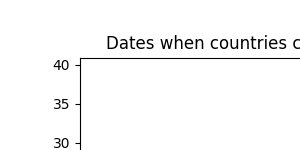

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111) # one row, one column, first plot (i.e. a single plot)
ax.plot(df2)
ax.set_xlabel('Date')
ax.set_ylabel('Number of countries')
ax.set_title('Dates when countries closed schools due to Covid-19')
# rotates and right aligns the x labels, and moves the bottom of the axes up to make room for them
fig.autofmt_xdate()
fig.canvas.draw()

This isn't a particularly useful chart, it serves here to show the basic techniques for creating a line chart.

What do you think might be a more useful chart to gain insight into the data?

### Practice creating your own line graph

#### Practice 1
The GCD_COVID spreadsheet also includes a sheet with a column showing the dates schools re-opened. Can you create a similar line chart that shows the school reopening dates?

You will need to import a different sheet from the excel workbook:
`df = pd.read_excel('CGD_COVID.xlsx', sheet_name='School reopening tracker- Global', skiprows = 1)`

#### Practice 2
Can you create a line chart from the maths achievement data? There are a lot of NaNs but try and create a chart with 3 lines showing the data for Canada, United States and United Kingdom over the period from 1995 to 2007.

You will need to investigate [matplotlib documentation](https://matplotlib.org/tutorials/introductory/pyplot.html) to find out how to display a line chart with multiple series.

You will need to use read_csv for this data: `df = pd.read_csv('math_achievement_8th_grade.csv')`

Use the cell below for your code.

In [ ]:
# You practice code goes here



## Bar charts
Read the [bar chart](https://datavizcatalogue.com/methods/bar_chart.html) entry in the data visualisation catalogue to understand more about the anatomy and use of bar charts.

### Create a bar chart
Let's try and recreate the first bar chart, 'Global school closures by date', from the ['School's out, now what?' article](https://www.cgdev.org/blog/schools-out-now-what). The x-axis shows days in March, the y-axis shows the number of countries announcing school closure.

The matplotlib syntax for a bar chart is: 
`Axes.bar(self, x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)[source]`

In [ ]:
df2.describe

In [ ]:
# We can still use the previous df2 dataframe for this activity

fig = plt.figure()
ax = fig.add_subplot(111)
# df2 = df2.groupby(["Date"]).size()

ax.bar(x=df2['Date'], height=df2, width = 0.8)
ax.set_xlabel('Days in March')
ax.set_ylabel('Countries announcing school closure')
ax.set_title('Global school closures by date')
fig.canvas.draw()
fig.savefig('my_figure.png')

### Practice creating your own bar chart
Now try and recreate one of the other bar charts from this article: https://www.cgdev.org/blog/schools-out-now-what

In [ ]:
# Your bar chart code here